In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Setting minimum passmark 
passmark = 40

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [57]:
#Creating a cummulative score for each student
df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']

In [62]:
#Percentage score of each student
df['Percentage'] = df['Total_Score']/3
#df.drop('Percentage', inplace=True, axis=1)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, '0'),
  Text(1, 0, '8'),
  Text(2, 0, '18'),
  Text(3, 0, '19'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40'),
  Text(21, 0, '41'),
  Text(22, 0, '42'),
  Text(23, 0, '43'),
  Text(24, 0, '44'),
  Text(25, 0, '45'),
  Text(26, 0, '46'),
  Text(27, 0, '47'),
  Text(28, 0, '48'),
  Text(29, 0, '49'),
  Text(30, 0, '5

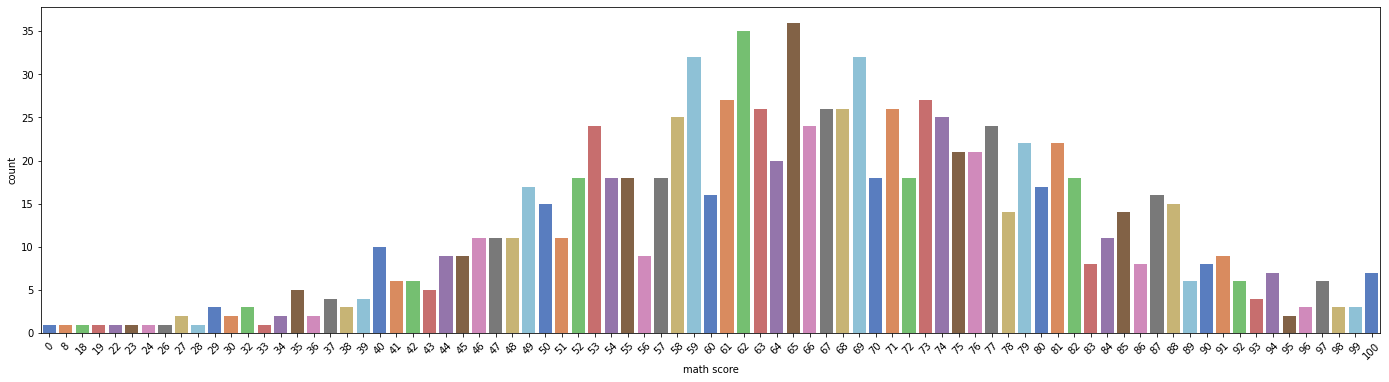

In [8]:
plt.figure(figsize=(24,6))
sns.countplot(x='math score', data=df, palette='muted')
plt.xticks(rotation=45)

In [9]:
df['Math_Pass_Status'] = np.where(df['math score'] < passmark, 'Fail', 'Pass')

In [13]:
df[['Math_Pass_Status']].value_counts().to_frame()

,0
Math_Pass_Status,
Pass,960
Carry_Over,40


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

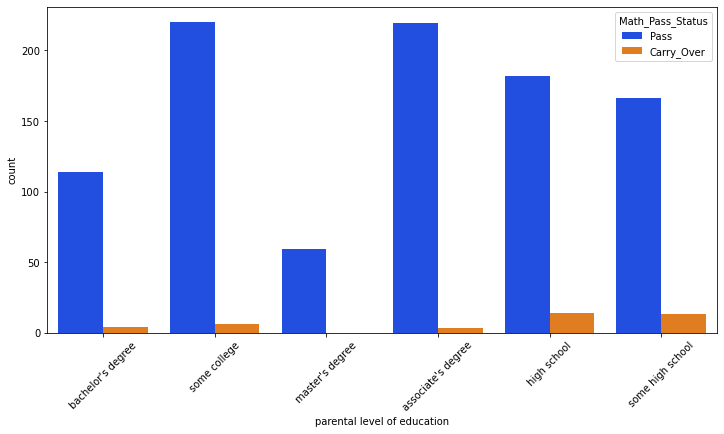

In [15]:
#Parents' level of education and how it affects thier child's Maths score
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education', data=df, hue='Math_Pass_Status', palette='bright')
plt.xticks(rotation=45)

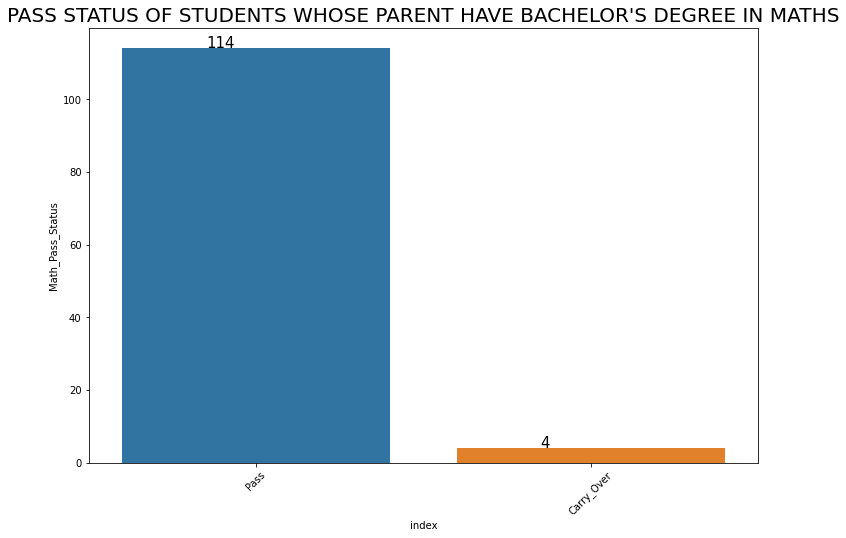

In [36]:
m = df[df['parental level of education'] == "bachelor's degree"]
movies = m['Math_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Math_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE BACHELOR'S DEGREE IN MATHS", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

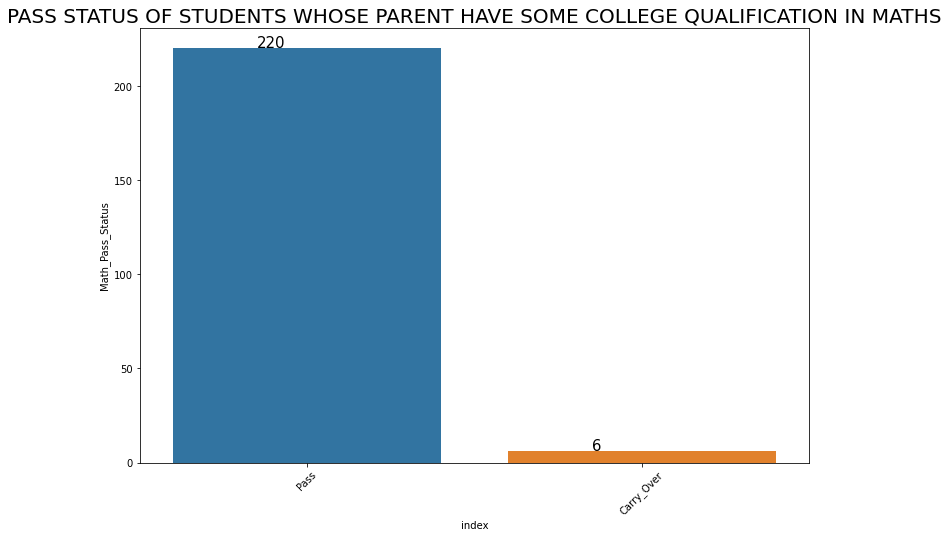

In [37]:
m = df[df['parental level of education'] == "some college"]
movies = m['Math_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Math_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE SOME COLLEGE QUALIFICATION IN MATHS", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

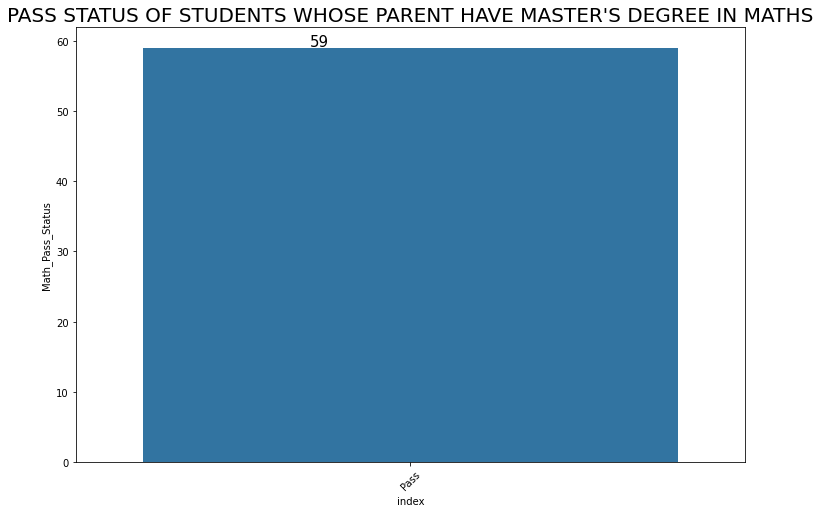

In [38]:
m = df[df['parental level of education'] == "master's degree"]
movies = m['Math_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Math_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE MASTER'S DEGREE IN MATHS", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

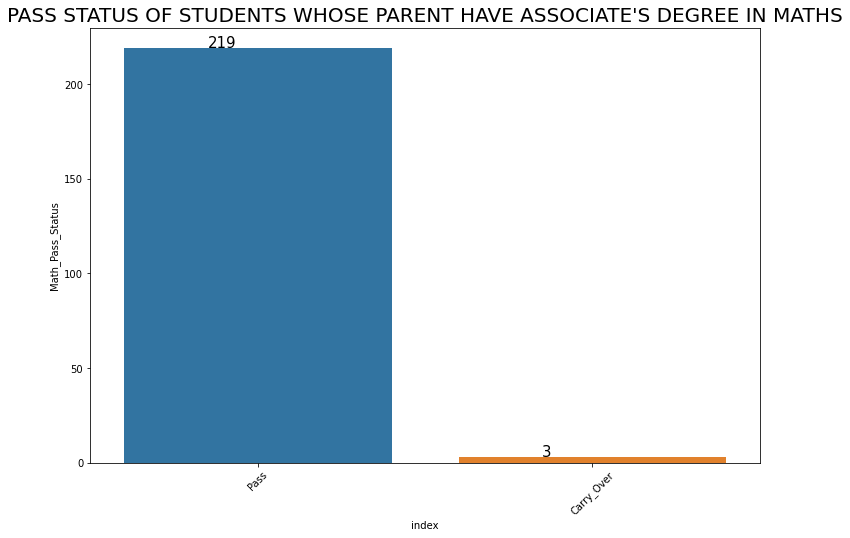

In [39]:
m = df[df['parental level of education'] == "associate's degree"]
movies = m['Math_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Math_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE ASSOCIATE'S DEGREE IN MATHS", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

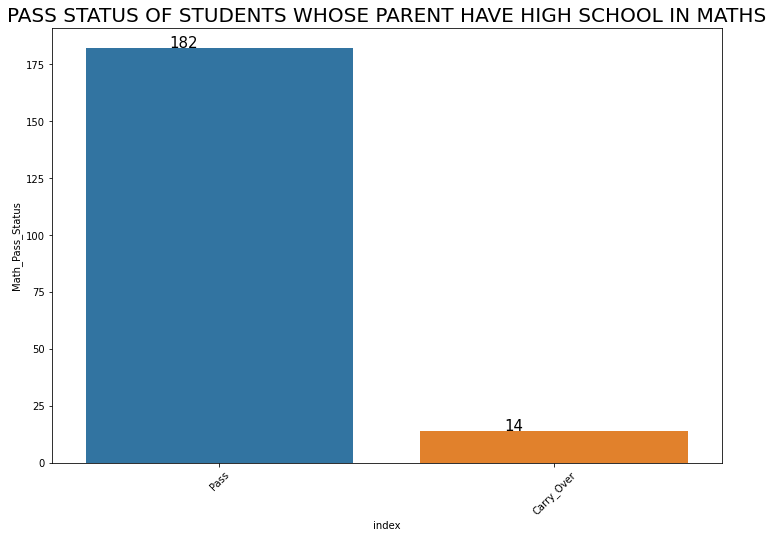

In [40]:
m = df[df['parental level of education'] == "high school"]
movies = m['Math_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Math_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE HIGH SCHOOL IN MATHS", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

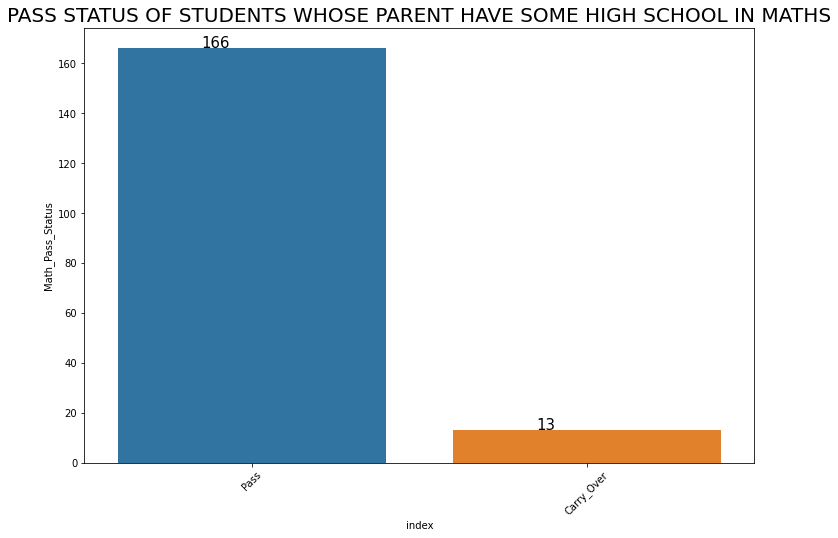

In [41]:
m = df[df['parental level of education'] == "some high school"]
movies = m['Math_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Math_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE SOME HIGH SCHOOL IN MATHS", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, '17'),
  Text(1, 0, '23'),
  Text(2, 0, '24'),
  Text(3, 0, '26'),
  Text(4, 0, '28'),
  Text(5, 0, '29'),
  Text(6, 0, '31'),
  Text(7, 0, '32'),
  Text(8, 0, '34'),
  Text(9, 0, '37'),
  Text(10, 0, '38'),
  Text(11, 0, '39'),
  Text(12, 0, '40'),
  Text(13, 0, '41'),
  Text(14, 0, '42'),
  Text(15, 0, '43'),
  Text(16, 0, '44'),
  Text(17, 0, '45'),
  Text(18, 0, '46'),
  Text(19, 0, '47'),
  Text(20, 0, '48'),
  Text(21, 0, '49'),
  Text(22, 0, '50'),
  Text(23, 0, '51'),
  Text(24, 0, '52'),
  Text(25, 0, '53'),
  Text(26, 0, '54'),
  Text(27, 0, '55'),
  Text(28, 0, '56'),
  Text(29, 0, '57'),
  Text(30, 0, '58'),
  Text(31, 0, '59'),
  Text(3

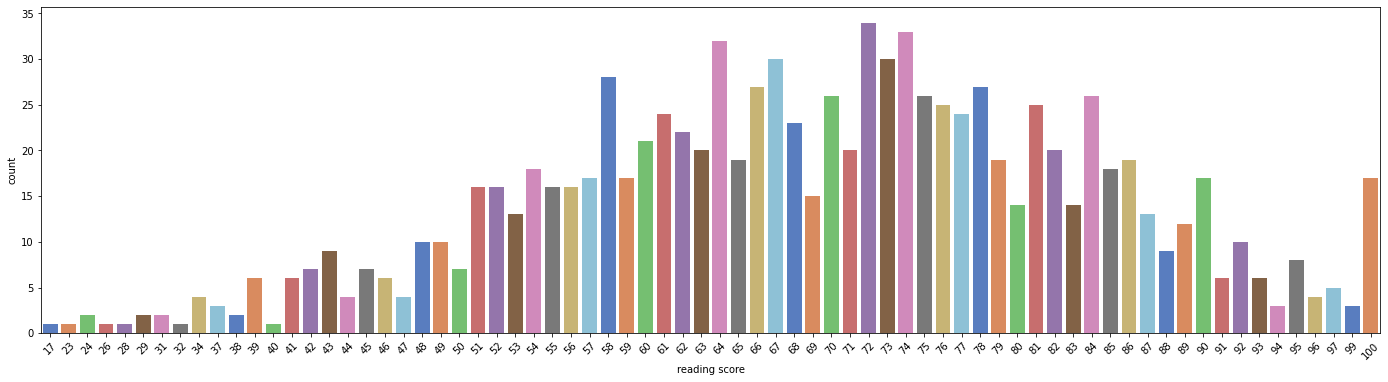

In [30]:
plt.figure(figsize=(24,6))
sns.countplot(x='reading score', data=df, palette='muted')
plt.xticks(rotation=45)

In [32]:
df['Reading_Pass_Status'] = np.where(df['reading score'] < passmark, 'Fail', 'Pass')
df[['Reading_Pass_Status']].value_counts().to_frame()

,0
Reading_Pass_Status,
Pass,974
Carry_Over,26


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

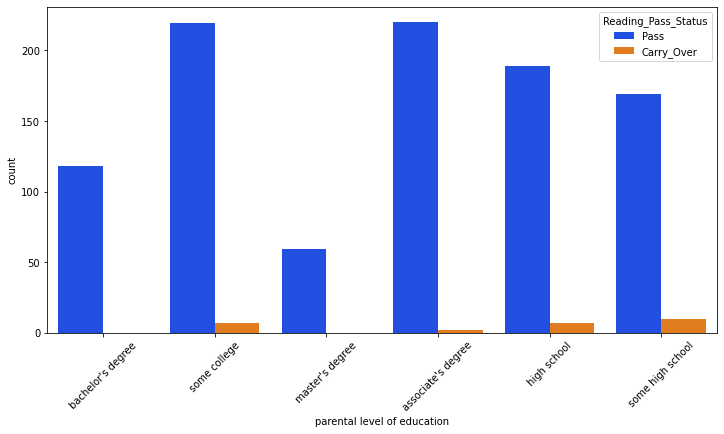

In [35]:
#Parents' level of education and how it affects thier child's Reading score
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education', data=df, hue='Reading_Pass_Status', palette='bright')
plt.xticks(rotation=45)

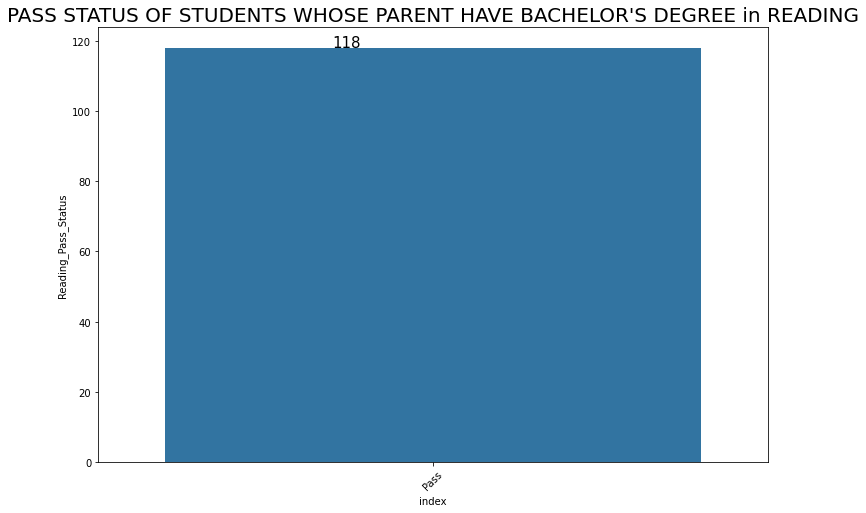

In [42]:
m = df[df['parental level of education'] == "bachelor's degree"]
movies = m['Reading_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Reading_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE BACHELOR'S DEGREE in READING", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

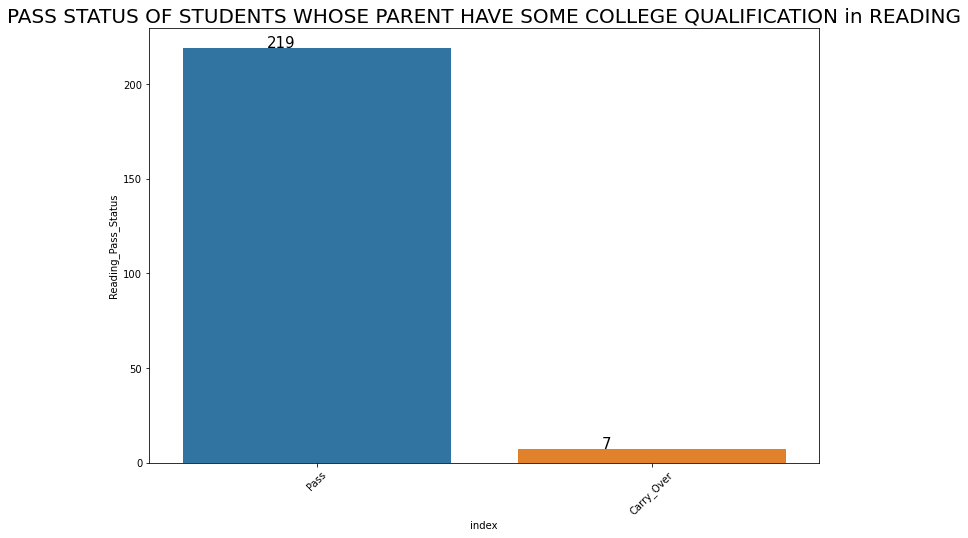

In [44]:
m = df[df['parental level of education'] == "some college"]
movies = m['Reading_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Reading_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE SOME COLLEGE QUALIFICATION in READING", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

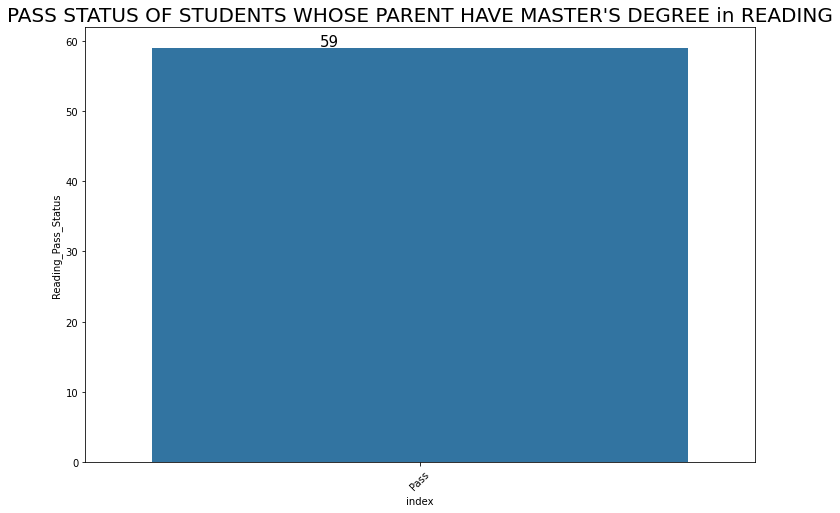

In [45]:
m = df[df['parental level of education'] == "master's degree"]
movies = m['Reading_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Reading_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE MASTER'S DEGREE in READING", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

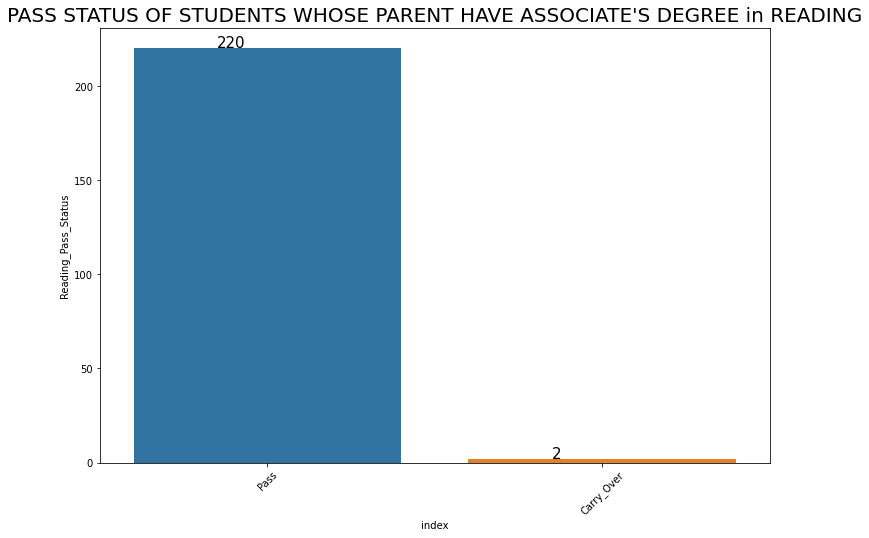

In [46]:
m = df[df['parental level of education'] == "associate's degree"]
movies = m['Reading_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Reading_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE ASSOCIATE'S DEGREE in READING", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

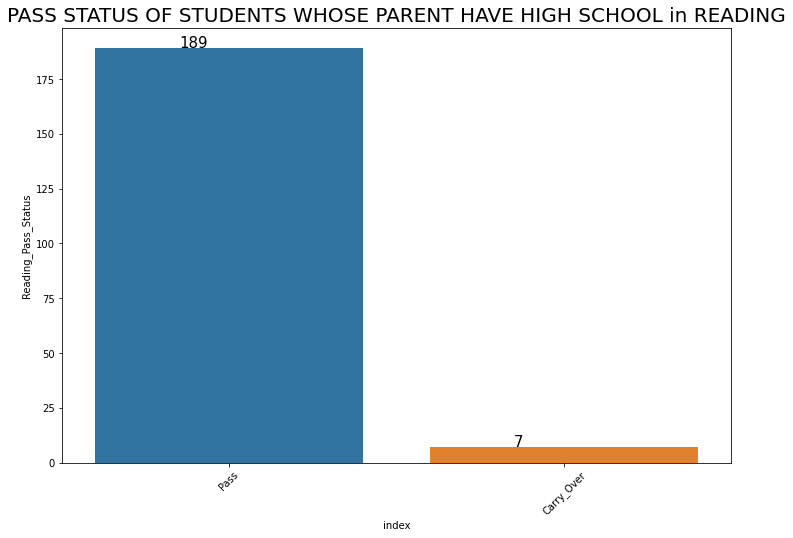

In [47]:
m = df[df['parental level of education'] == "high school"]
movies = m['Reading_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Reading_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE HIGH SCHOOL in READING", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

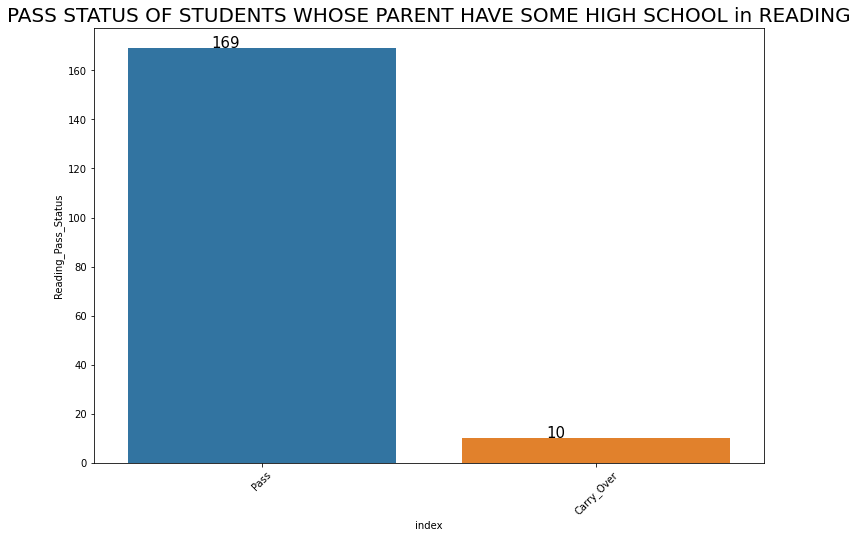

In [48]:
m = df[df['parental level of education'] == "some high school"]
movies = m['Reading_Pass_Status'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Reading_Pass_Status'])
plt.title("PASS STATUS OF STUDENTS WHOSE PARENT HAVE SOME HIGH SCHOOL in READING", fontsize=20)
plt.xticks(rotation=45)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 [Text(0, 0, '10'),
  Text(1, 0, '15'),
  Text(2, 0, '19'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '27'),
  Text(6, 0, '28'),
  Text(7, 0, '30'),
  Text(8, 0, '32'),
  Text(9, 0, '33'),
  Text(10, 0, '34'),
  Text(11, 0, '35'),
  Text(12, 0, '36'),
  Text(13, 0, '37'),
  Text(14, 0, '38'),
  Text(15, 0, '39'),
  Text(16, 0, '40'),
  Text(17, 0, '41'),
  Text(18, 0, '42'),
  Text(19, 0, '43'),
  Text(20, 0, '44'),
  Text(21, 0, '45'),
  Text(22, 0, '46'),
  Text(23, 0, '47'),
  Text(24, 0, '48'),
  Text(25, 0, '49'),
  Text(26, 0, '50'),
  Text(27, 0, '51'),
  Text(28, 0, '52'),
  Text(29, 0, '53'),
  Text(30, 0, '54'),
  Text(31

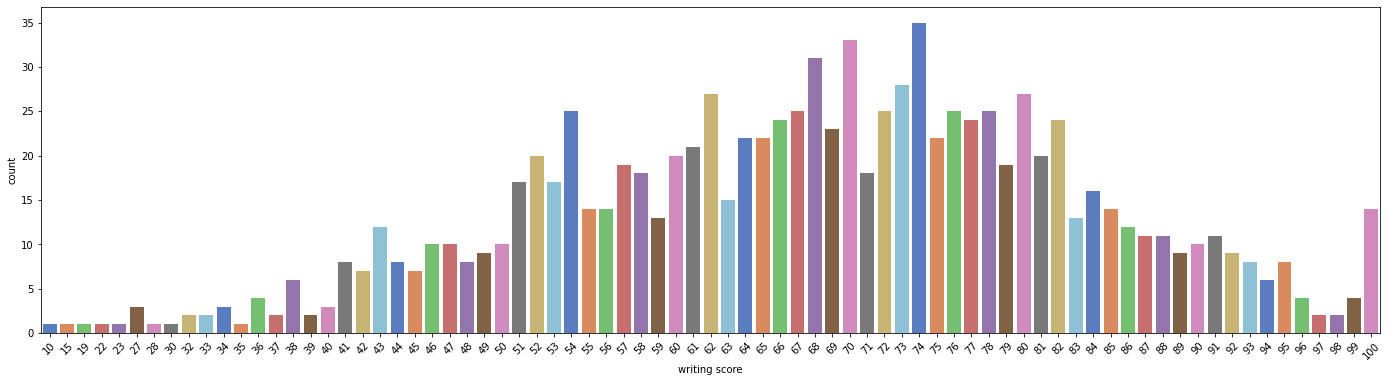

In [49]:
plt.figure(figsize=(24,6))
sns.countplot(x='writing score', data=df, palette='muted')
plt.xticks(rotation=45)

In [50]:
df['Writing_Pass_Status'] = np.where(df['writing score'] < passmark, 'Fail', 'Pass')
df[['Writing_Pass_Status']].value_counts().to_frame()

,0
Writing_Pass_Status,
Pass,968
Carry_Over,32


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

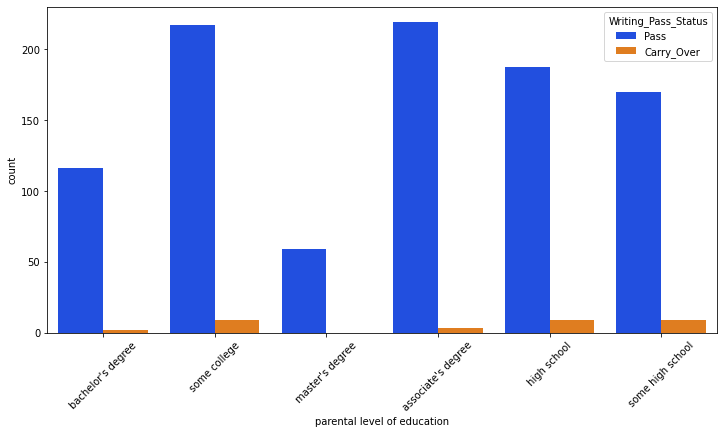

In [54]:
#Parents' level of education and how it affects thier child's Writing score
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education', data=df, hue='Writing_Pass_Status', palette='bright')
plt.xticks(rotation=45)

In [55]:
df['Cum_PassStatus'] = df.apply(lambda x : 'Fail' 
                               if x['Math_Pass_Status'] == 'Fail' 
                               or x['Reading_Pass_Status'] == 'Fail' 
                               or x['Writing_Pass_Status'] == 'Fail' 
                               else 'Pass', axis = 1)
df.Cum_PassStatus.value_counts()

Pass          949
Carry_Over     51
Name: Cum_PassStatus, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

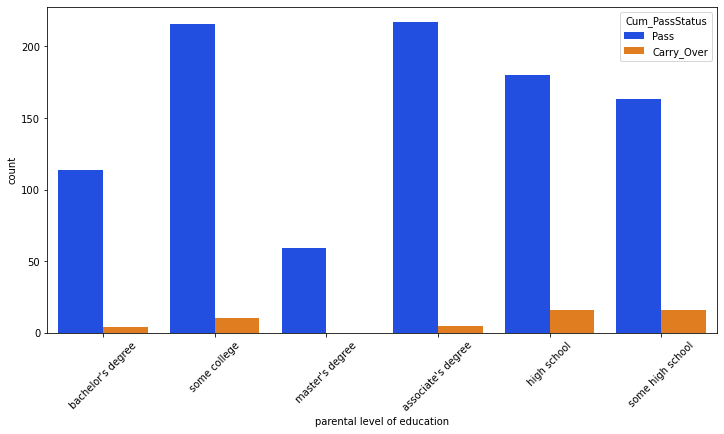

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education', data=df, hue='Cum_PassStatus', palette='bright')
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

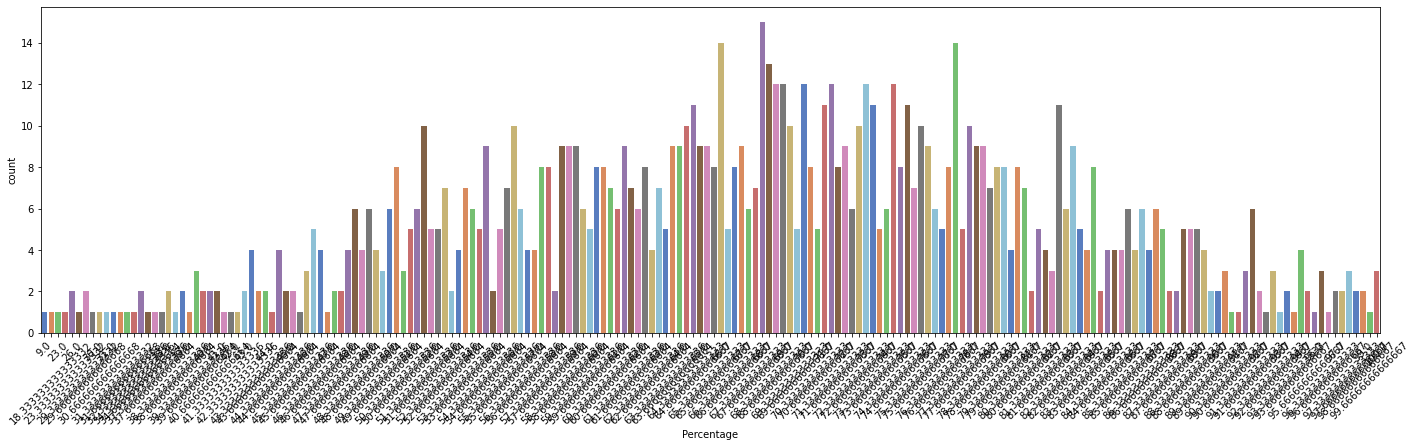

In [63]:
plt.figure(figsize=(24,6))
sns.countplot(x='Percentage', data=df, palette='muted')
plt.xticks(rotation=45)

In [76]:
def Grade(Percentage):
    if (Percentage >= 70):
        return 'A'
    if (Percentage >=60):
        return 'B'
    if (Percentage >= 50):
        return 'C'
    if (Percentage >= 45):
        return 'D'
    if (Percentage >= 40):
        return 'E'
    else:
        return 'F'

In [77]:
df['Grades'] = df.apply(lambda x : 
                       Grade(x['Percentage']), axis=1)
df.Grades.value_counts().to_frame()

,Grades
A,459
B,256
C,182
D,49
F,30
E,24


In [78]:
Overall_Grade_Cal = df.Grades.value_counts().to_frame()
Overall_Grade_Cal.rename(columns={'Grades': 'Overall_Grade'}, inplace=True)
Overall_Grade_Cal.index.name = 'Grade'
Overall_Grade_Cal.sort_values(by = 'Grade', ascending = True)

,Overall_Grade
Grade,
A,459
B,256
C,182
D,49
E,24
F,30


<AxesSubplot:xlabel='Grades', ylabel='count'>

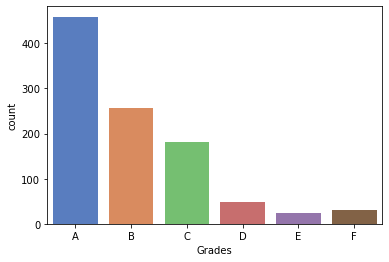

In [80]:
sns.countplot(x='Grades', data=df, order=['A', 'B', 'C', 'D', 'E', 'F'], palette = 'muted')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

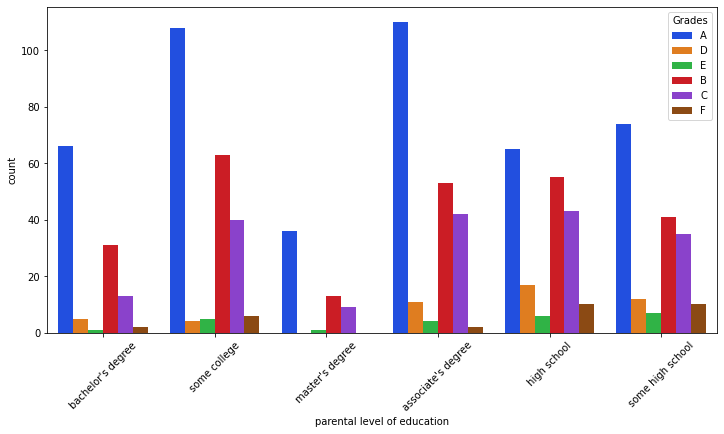

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education', data=df, hue='Grades', palette='bright')
plt.xticks(rotation=45)

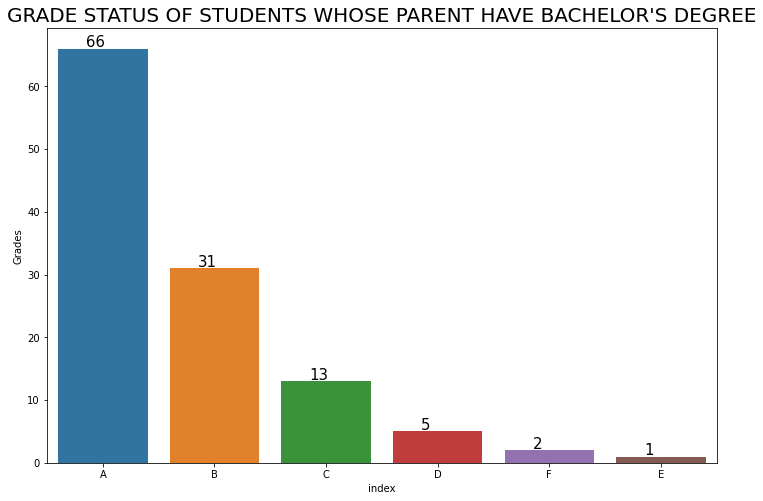

In [83]:
m = df[df['parental level of education'] == "bachelor's degree"]
movies = m['Grades'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Grades'])
plt.title("GRADE STATUS OF STUDENTS WHOSE PARENT HAVE BACHELOR'S DEGREE", fontsize=20)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

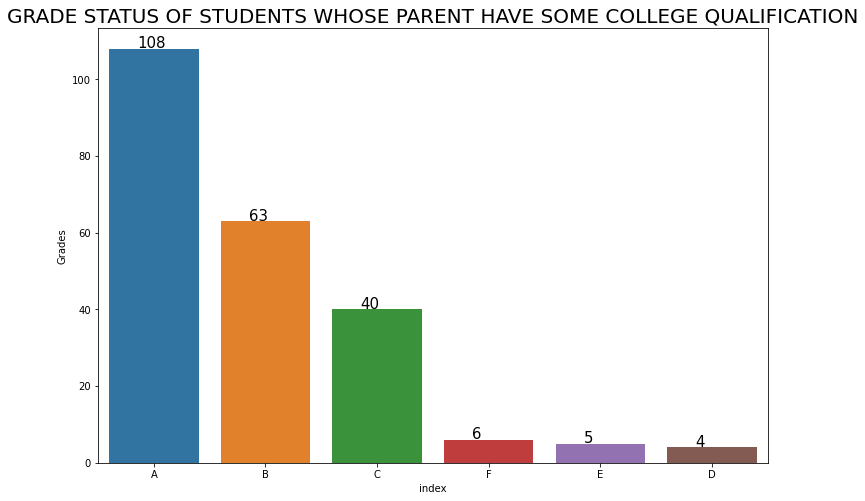

In [84]:
m = df[df['parental level of education'] == "some college"]
movies = m['Grades'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Grades'])
plt.title("GRADE STATUS OF STUDENTS WHOSE PARENT HAVE SOME COLLEGE QUALIFICATION", fontsize=20)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

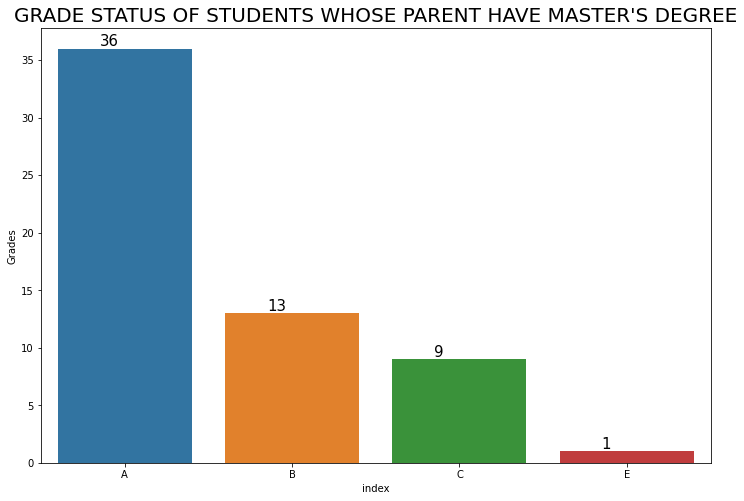

In [85]:
m = df[df['parental level of education'] == "master's degree"]
movies = m['Grades'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Grades'])
plt.title("GRADE STATUS OF STUDENTS WHOSE PARENT HAVE MASTER'S DEGREE", fontsize=20)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

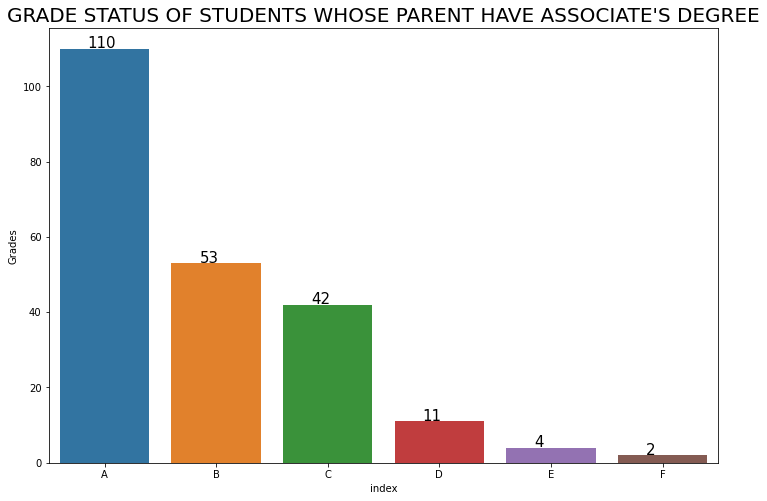

In [86]:
m = df[df['parental level of education'] == "associate's degree"]
movies = m['Grades'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Grades'])
plt.title("GRADE STATUS OF STUDENTS WHOSE PARENT HAVE ASSOCIATE'S DEGREE", fontsize=20)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

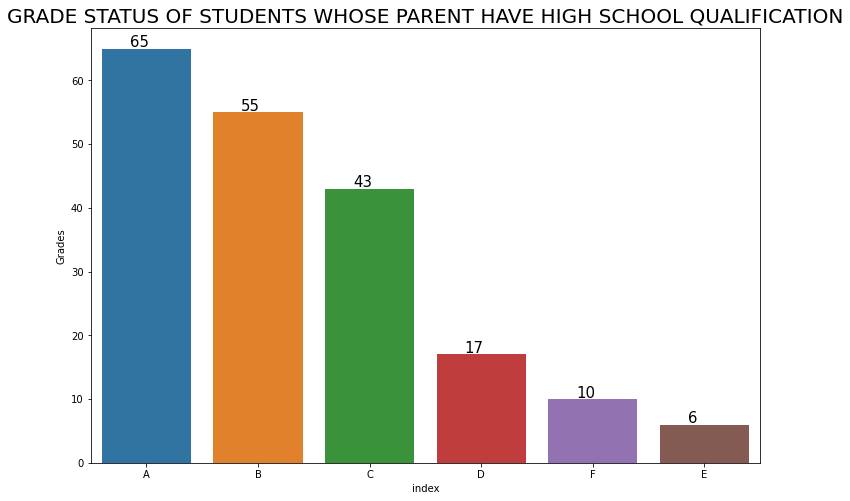

In [87]:
m = df[df['parental level of education'] == "high school"]
movies = m['Grades'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Grades'])
plt.title("GRADE STATUS OF STUDENTS WHOSE PARENT HAVE HIGH SCHOOL QUALIFICATION", fontsize=20)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

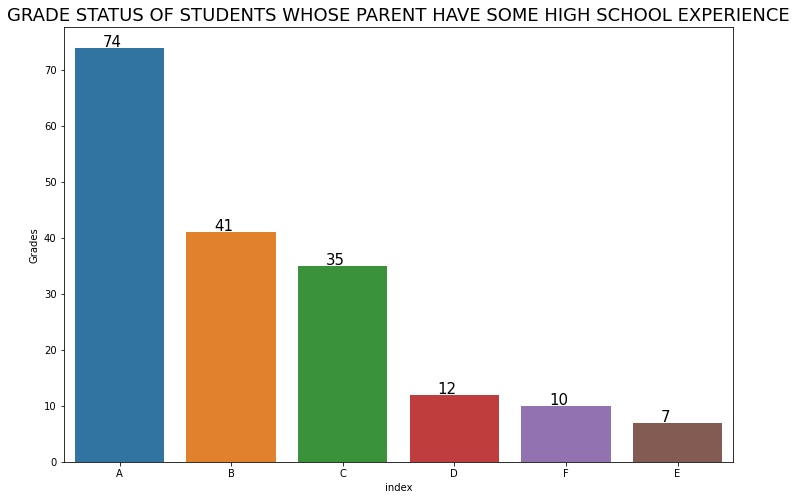

In [90]:
m = df[df['parental level of education'] == "some high school"]
movies = m['Grades'].value_counts().reset_index()

plt.figure(figsize=(12,8))
BSc = sns.barplot(x=movies['index'], y=movies['Grades'])
plt.title("GRADE STATUS OF STUDENTS WHOSE PARENT HAVE SOME HIGH SCHOOL EXPERIENCE", fontsize=18)

for i in BSc.patches:
    BSc.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')